# Modelos clásicos de Machine Learning

Este cuaderno muestra ejemplos simples en Python usando **scikit-learn** para:

- Regresión lineal y polinomial
- K-Nearest Neighbors (KNN)
- Árboles de decisión
- Random Forests
- Support Vector Machines (SVM)

Cada sección genera datos (sintéticos) y visualiza los resultados con **matplotlib**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.datasets import make_regression, make_moons, make_classification, make_circles

np.random.seed(42)
%matplotlib inline

In [2]:
def plot_decision_boundary(clf, X, y, title=None, h=0.02):
    """Plot 2D decision boundary for a classifier.

    Parameters
    ----------
    clf : trained classifier with .predict
    X : array-like of shape (n_samples, 2)
    y : array-like of shape (n_samples,)
    title : str or None
    h : float, step size in the mesh
    """
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    if title:
        plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.tight_layout()
    plt.show()

## 1. Regresión lineal

MSE (test): 246.12179288664484
R^2 (test): 0.9680853989031325


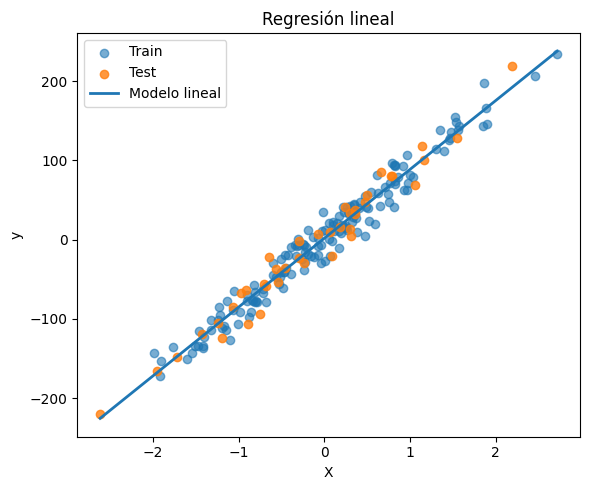

In [3]:
# Generar datos de regresión lineal
X, y = make_regression(n_samples=200, n_features=1, noise=15.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print('MSE (test):', mean_squared_error(y_test, y_pred))
print('R^2 (test):', r2_score(y_test, y_pred))

# Visualización de la recta
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_plot = lin_reg.predict(X_plot)

plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, alpha=0.6, label='Train')
plt.scatter(X_test, y_test, alpha=0.8, label='Test')
plt.plot(X_plot, y_plot, linewidth=2, label='Modelo lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión lineal')
plt.legend()
plt.tight_layout()
plt.show()

## 2. Regresión polinomial

MSE (test): 0.06769930065817821
R^2 (test): 0.8858282733004782


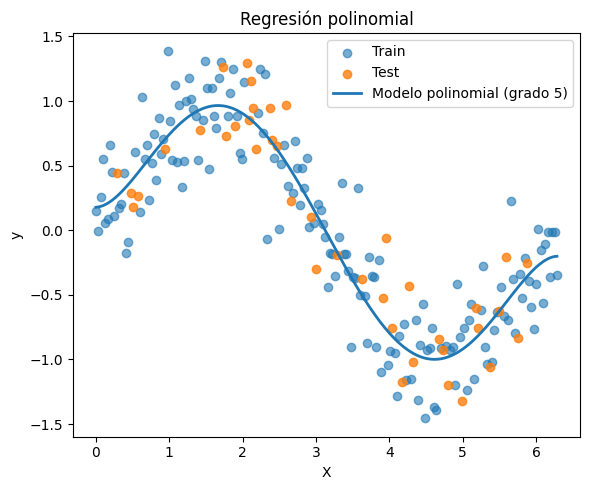

In [4]:
# Datos no lineales (seno con ruido)
X = np.linspace(0, 2 * np.pi, 200).reshape(-1, 1)
y = np.sin(X[:, 0]) + 0.3 * np.random.randn(200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('lin_reg', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)

print('MSE (test):', mean_squared_error(y_test, y_pred))
print('R^2 (test):', r2_score(y_test, y_pred))

# Visualización de la curva ajustada
X_plot = np.linspace(0, 2 * np.pi, 400).reshape(-1, 1)
y_plot = poly_model.predict(X_plot)

plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, alpha=0.6, label='Train')
plt.scatter(X_test, y_test, alpha=0.8, label='Test')
plt.plot(X_plot, y_plot, linewidth=2, label='Modelo polinomial (grado 5)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión polinomial')
plt.legend()
plt.tight_layout()
plt.show()

## 3. K-Nearest Neighbors (KNN)

Accuracy (test): 0.95


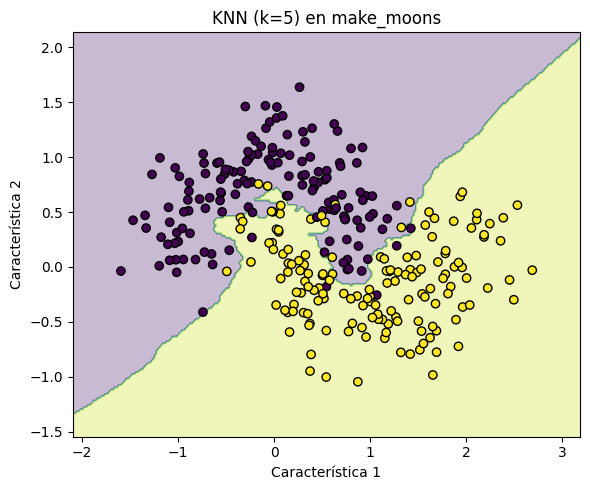

In [5]:
# Datos de clasificación no lineal (make_moons)
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy (test):', accuracy_score(y_test, y_pred))

# Visualizar frontera de decisión
plot_decision_boundary(knn, X, y, title='KNN (k=5) en make_moons')

## 4. Árbol de decisión

Accuracy (test): 0.9


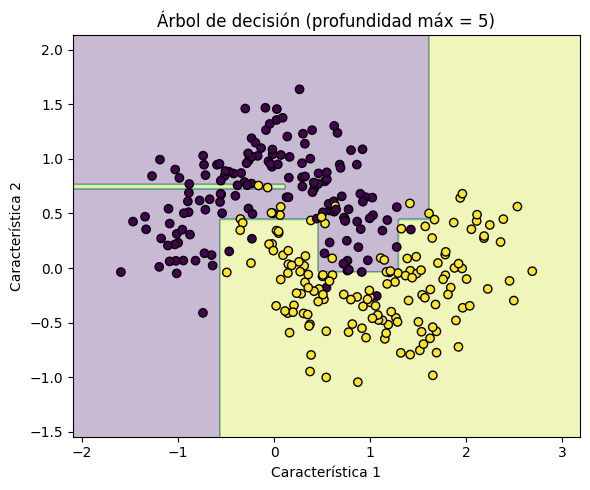

In [6]:
# Usar los mismos datos make_moons para comparar
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

print('Accuracy (test):', accuracy_score(y_test, y_pred))

plot_decision_boundary(tree_clf, X, y, title='Árbol de decisión (profundidad máx = 5)')

## 5. Random Forests

Accuracy (test): 0.85


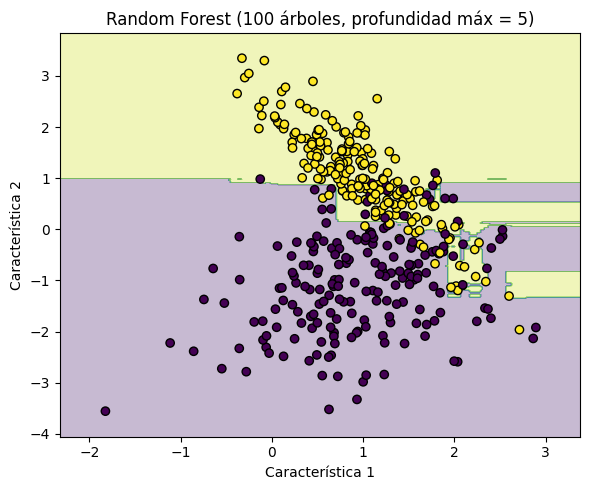

In [7]:
# Datos de clasificación más generales
X, y = make_classification(
    n_samples=400,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('Accuracy (test):', accuracy_score(y_test, y_pred))

plot_decision_boundary(rf_clf, X, y, title='Random Forest (100 árboles, profundidad máx = 5)')

## 6. Support Vector Machines (SVM)

Accuracy (test): 1.0


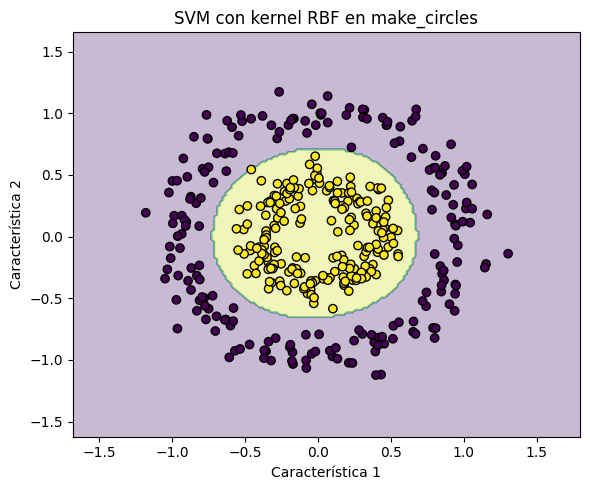

In [8]:
# Datos de círculos concéntricos para mostrar kernel RBF
X, y = make_circles(n_samples=400, factor=0.4, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)

print('Accuracy (test):', accuracy_score(y_test, y_pred))

plot_decision_boundary(svm_rbf, X, y, title='SVM con kernel RBF en make_circles')